In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uIGMoTkuOowocEqztw2FcyJzZJxWxPaM' -O earthquake_ml_ready.csv

--2025-10-18 13:49:07--  https://docs.google.com/uc?export=download&id=1uIGMoTkuOowocEqztw2FcyJzZJxWxPaM
Resolving docs.google.com (docs.google.com)... 173.194.212.139, 173.194.212.138, 173.194.212.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.212.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1uIGMoTkuOowocEqztw2FcyJzZJxWxPaM&export=download [following]
--2025-10-18 13:49:07--  https://drive.usercontent.google.com/download?id=1uIGMoTkuOowocEqztw2FcyJzZJxWxPaM&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152336 (149K) [application/octet-stream]
Saving to: ‘earthquake_ml_ready.csv’

earthquake_ml_ready 100%[===================>] 148.77K 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('earthquake_ml_ready.csv')
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,year,month,tsunami
0,0.192308,0.888889,0.750,0.052212,0.125268,0.028832,0.071130,0.016913,0.389963,0.944204,1.0,0.909091,1.0
1,0.153846,0.444444,0.375,0.037611,0.105996,0.126260,0.142259,0.033378,0.426226,0.780541,1.0,0.909091,0.0
2,0.192308,0.333333,0.250,0.046460,0.157388,0.177014,0.075314,0.862583,0.313138,0.004510,1.0,0.909091,1.0
3,0.307692,0.555556,0.500,0.080973,0.159529,0.105642,0.087866,0.051339,0.318825,0.021797,1.0,0.909091,1.0
4,0.038462,0.000000,0.125,0.008850,0.140257,0.283109,0.112971,0.930631,0.271604,0.996152,1.0,0.909091,1.0


In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    float64
 2   mmi        782 non-null    float64
 3   sig        782 non-null    float64
 4   nst        782 non-null    float64
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  year       782 non-null    float64
 11  month      782 non-null    float64
 12  tsunami    782 non-null    float64
dtypes: float64(13)
memory usage: 79.6 KB
None
        magnitude         cdi         mmi         sig         nst        dmin  \
count  782.000000  782.000000  782.000000  782.000000  782.000000  782.000000   
mean     0.169664    0.481529    0.620524    0.097393    0.246521    0.075097   
std  

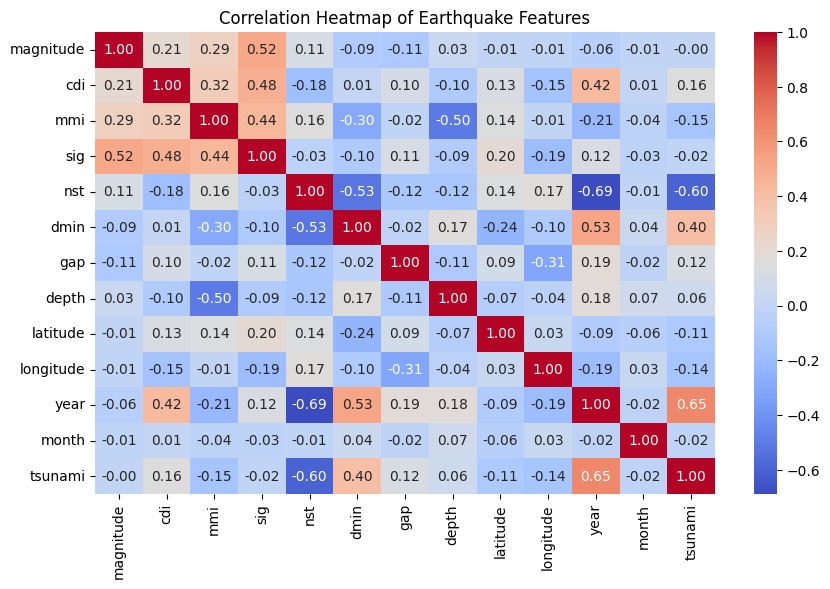

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Earthquake Features')
plt.show()

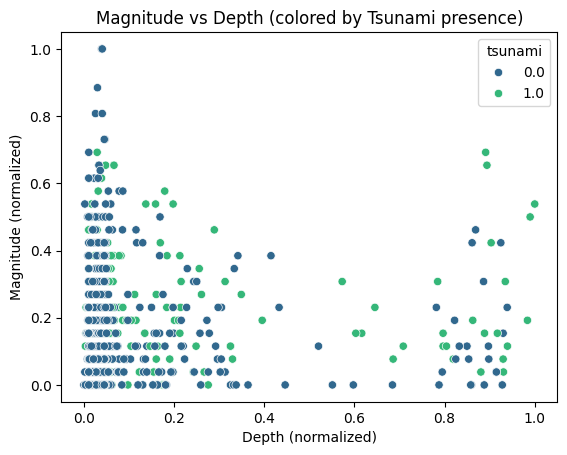

In [6]:
sns.scatterplot(x='depth', y='magnitude', data=data, hue='tsunami', palette='viridis')
plt.title('Magnitude vs Depth (colored by Tsunami presence)')
plt.xlabel('Depth (normalized)')
plt.ylabel('Magnitude (normalized)')
plt.show()

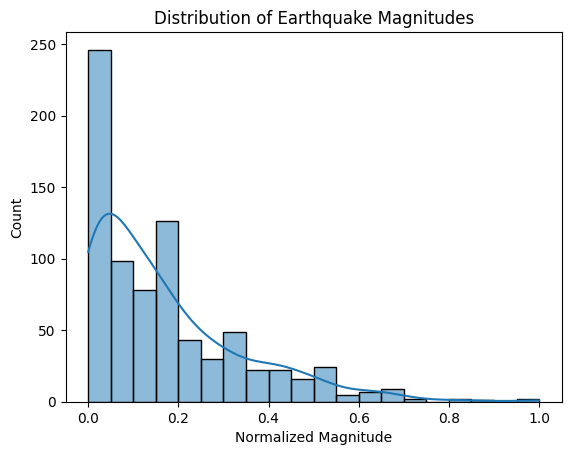

In [7]:
sns.histplot(data['magnitude'], kde=True, bins=20)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Normalized Magnitude')
plt.ylabel('Count')
plt.show()


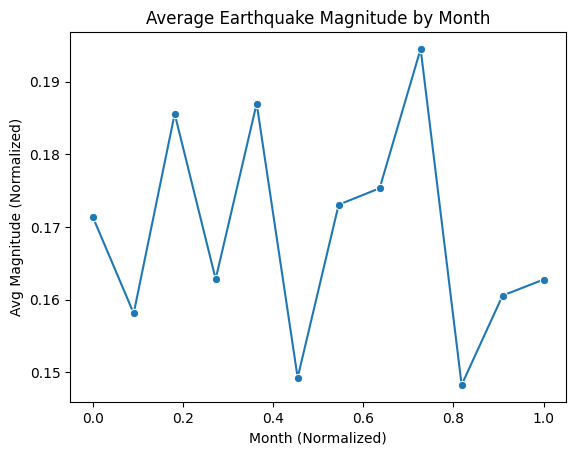

In [8]:
avg_mag_by_month = data.groupby('month')['magnitude'].mean().reset_index()
sns.lineplot(x='month', y='magnitude', data=avg_mag_by_month, marker='o')
plt.title('Average Earthquake Magnitude by Month')
plt.xlabel('Month (Normalized)')
plt.ylabel('Avg Magnitude (Normalized)')
plt.show()

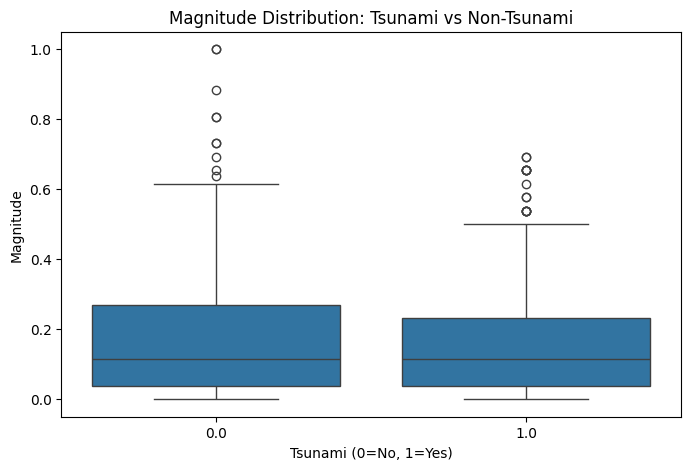

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='tsunami', y='magnitude', data=data)
plt.title('Magnitude Distribution: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0=No, 1=Yes)')
plt.ylabel('Magnitude')
plt.show()

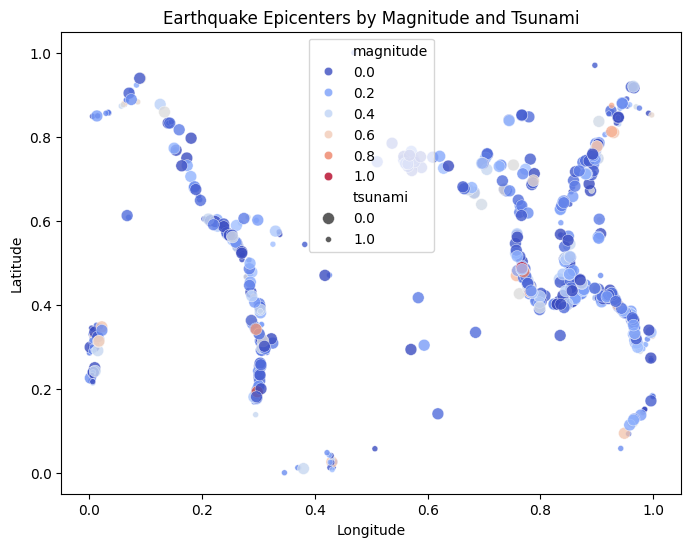

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude', y='latitude', hue='magnitude', size='tsunami', data=data, palette='coolwarm', alpha=0.8)
plt.title('Earthquake Epicenters by Magnitude and Tsunami')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()